In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

Взятые данные были предоставлены в качестве исходных данных для одного из существующих соревнований на сайте Kagge

# Context

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

In [5]:
df = pd.read_csv('./wine/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Степень зрелости винограда зависит от температуры воздуха и количества получаемого солнечного света. Уровень алкоголя в вине зависит от концентрации сахара в вызревших ягодах, соответственно, в процессе созревания винограда кислотность в нем снижается. Это объясняет почему сладкие вина имеют более высокий уровень алкоголя и низкую кислотность, а вина невысокой крепости часто бывают высококислотными.  Вино с низким уровнем кислотности будет казаться вялым и безжизненным.

Проверим утверждение:
**сладкие вина имеют более высокий уровень алкоголя и низкую кислотность, а вина невысокой крепости часто бывают высококислотными.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fd051a3d0>]],
      dtype=object)

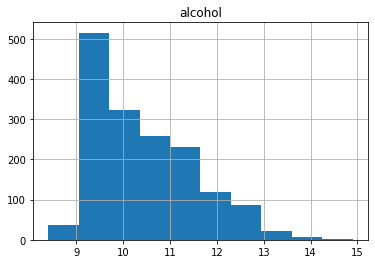

In [17]:
df[['pH', 'alcohol']].set_index('pH').sort_index().hist()